<a href="https://colab.research.google.com/github/rzlina/ATMS511_Lab/blob/master/PS3A_Lina_Rivelli_Zea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>
<h1>ATMS 420/CEE 447: Python Session 3</h1>
<h2>Part A: Atmospheric Stability [25 pts]</h2>
<h3>Session Date: Friday, February 15, <br>
 Due Date: Friday, March 8</h3>
<p>In this python session you will ...
<ul>
<li>Apply the concepts discussed in Chapter 4 of Jacob's Introduction to Atmospheric Chemistry.</li>
<li>Learn how to use MetPy to plot sonde data.</li>
<li></li>
<li></li>
</ul>
</p>
<p>Take the time to read through the explanations. 
You can work through this worksheet on your own or in groups of two. 
If you worked with someone else, you only need to turn in one assignment (with both of your names written on them). 
It you don’t quite finish in class today, you can do so on your own. Remember to share the Google Colaboratory file with your partners.</p>

<h2>Question 1</h2>
<!-- I can't see this. -->


In [0]:
# This needs to be done every time you want to use metpy!
# The following instructions install the python packages required by metpy.
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install geos
!pip install pyproj
!pip install cython
!pip install pyshp
!pip install shapely
!pip install cartopy==0.16.0
!pip install metpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 6 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (371 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 131294 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-

In [0]:
# Now we are importing the packages and functions we want to perform our plot.
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from metpy.calc import dewpoint_rh
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, Hodograph, SkewT
from metpy.units import units

# This is a way to read in a data file using the pandas package.
df = pd.read_csv('/content/drive/My Drive/20190202.csv', encoding = "ISO-8859-1").drop([0,1])

# This command allows you to see the keys of the pandas dataframe you created in the command above.
print(df.keys())

# Adding in the surface conditions that did not register in the sounding
pnew = np.insert(df['Press'].values,0,995)
Tnew = np.insert(df['Temp'].values,0,2.2)
humnew = np.insert(df['RelHum'].values,0,df['RelHum'].values[0])

# Performing data conversions with metpy units module
p = pnew.astype('float') * units.hPa
print(type(p))
T = Tnew.astype('float') * units.celsius
Td = dewpoint_rh(Tnew.astype('float')*units.celsius, humnew.astype('float')/100.)
wind_speed = df['WSpeed'].values.astype('float') * units.knots
wind_dir = df['WDirn'].values.astype('float') * units.degrees
z = df['GPM_AGL'].values.astype('float') * units.meters
u, v = mpcalc.wind_components(wind_speed, wind_dir)
df['Time']

Index(['Time', 'Press', 'Temp', 'RelHum', 'WSpeed', 'WDirn', 'GPM_AGL'], dtype='object')
<class 'pint.quantity.build_quantity_class.<locals>.Quantity'>


2          0.0
3          1.0
4          2.0
5          3.0
6          4.0
7          5.0
8          6.0
9          7.0
10         8.0
11         9.0
12        10.0
13        11.0
14        12.0
15        13.0
16        14.0
17        15.0
18        16.0
19        17.0
20        18.0
21        19.0
22        20.0
23        21.0
24        22.0
25        23.0
26        24.0
27        25.0
28        26.0
29        27.0
30        28.0
31        29.0
         ...  
4135    4133.0
4136    4134.0
4137    4135.0
4138    4136.0
4139    4137.0
4140    4138.0
4141    4139.0
4142    4140.0
4143    4141.0
4144    4142.0
4145    4143.0
4146    4144.0
4147    4145.0
4148    4146.0
4149    4147.0
4150    4148.0
4151    4149.0
4152    4150.0
4153    4151.0
4154    4152.0
4155    4153.0
4156    4154.0
4157    4155.0
4158    4156.0
4159    4157.0
4160    4158.0
4161    4159.0
4162    4160.0
4163    4161.0
4164    4162.0
Name: Time, Length: 4163, dtype: object

In [0]:
#df = pd.read_csv('/content/drive/My Drive/20190202.csv', encoding = "ISO-8859-1").drop([0,1])

/usr/local/lib/python3.6/dist-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


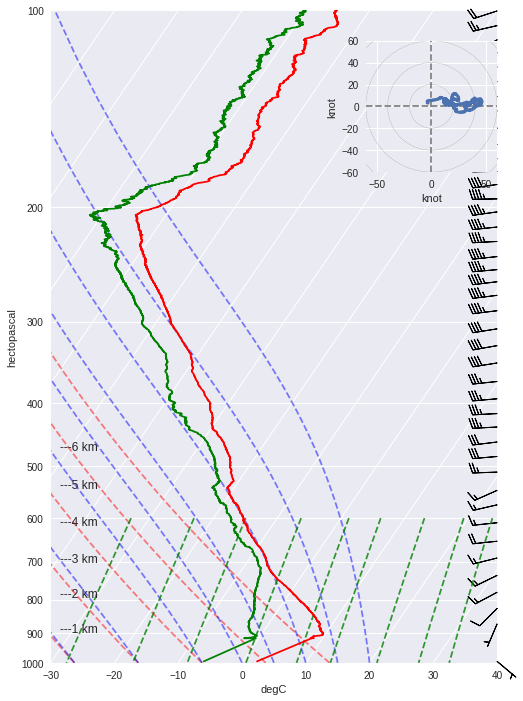

In [0]:
# Making the figure object to start plotting
fig = plt.figure(figsize=(8, 12))

# Grid for plots
gs = gridspec.GridSpec(3, 3)
skew = SkewT(fig, rotation=45) #, subplot=gs[:, :2])

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p,T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::100], u[::100], v[::100])
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Good bounds for aspect ratio
skew.ax.set_xlim(-30, 40)

heights = np.array([1, 2, 3, 4, 5, 6,]) * units.km
std_pressures = mpcalc.height_to_pressure_std(heights)
for height_tick, p_tick in zip(heights, std_pressures):
    trans, _, _ = skew.ax.get_yaxis_text1_transform(0)
    skew.ax.text(0.02, p_tick, '---{:~d}'.format(height_tick), transform=trans)

## Create a hodograph
ax = fig.add_subplot(gs[0, -1])
h = Hodograph(ax, component_range=60.)
h.add_grid(increment=20)
h.plot(u, v)

# Show the plot
plt.show()

# See http://ww2010.atmos.uiuc.edu/(Gl)/guides/maps/sfcobs/wnd.rxml

<h2>Question 1</h2>
<p>The above sounding was deployed from the Natural History Building on February 2, 2019. Click in cell to answer each question below.</p>
 <ol> 
<li>In Figure 1 mark all inversion layers. [2 pt]</li>
 
  
<li>Which layers are stable? Explain briefly [2 pt]</li>

                   
<li>Which layers are unstable? Explain briefly [2 pt]</li>
</ol>


ANSWERS

1.  If the temperature increases with height, this condition is called inversion. 

In figure 1, the inversion layers are:

- In the 1000-900 hPa portion of temperature profile
- At 5 km 
- Near 200 hPa (above the tropopause from 210 to 100 mb)

2. Stable layers: lapse rate < dry lapse rate

In figure 1, the stable layers are:

- In the 1000-900 hPa portion of temperature profile
- At 5 km (between 550 to 530 mb)
- Near 200 hPa (from 210 to 100 mb)

3.    Unstable layers: lapse rate parcel  > dry lapse rate 

In figure 1, the unstable layers are:
 
 - From 900 to 720 mb

<h2>Question 2</h2>
<p>Consider a column model for transport across the contiguous US in which a column of air extending from the surface to $3\ km$ altitude (the top of the boundary layer) is transported west to east across the US, a total distance of $5000\ km$ coast to coast, at a wind speed of $10$ $ms^{-1}$. </p>
<p>The number concentration of air molecules in this column is taken to be $n_a$ = $2 x 10^{19}$ $molecules$ $cm^{-3}$. The US fossil fuel source of $CO_2$ is $2.0\ Pg\ Cyr^{-1}$ and
we assume it to be evenly distributed over the contiguous US surface area of $7 x10^{6}\ km^{2}$. The molar mass of carbon is $12\ g/mol$.</p>

<ol>
<li>Assuming no other source or sink of $CO_2$ in the US, calculate the resulting
increase of $CO_2$ mixing ratio from the west coast to the east coast. [5 pt]
<ul>
 <li>**Hints:** Start solving this question by writing down everything in terms of number concentration.</li>
<li>Write down the puff model equation for the rate increase in the number concentration of $CO_2$ molecules like this: $\frac{dn}{dt}$ = ... </li>
<li>Work out what the emission flux is in units of $molecules\  cm^{-2} s^{-1}$.</li>
<li>Work out the transport time across the US.</li></ul>
<li>With $CO_2$ monitoring instruments having 1 ppmv precision deployed on both coasts, and assuming that the column model is correct, would you be able to determine whether or not land uptake of $CO_2$ in the US is offsetting fossil fuel emission? [2 pt]</li>
</ol>

In [0]:
#Initial conditions

d = 5000*10e5 # distance in km converted to cm
u = 10*100 # wind speed (cm*s-1)
n = 2.0e19 #number of concentration of air in a column (molecules*cm-3)
S_CO2 = 2.0e15*(1/3.15e17) # total CO2 in (PgC*y-1) converted to (gCs-1) 
A = 7e16*10e10 # Surface area (cm2)
Mc = 12.0 #Carbon molar mass (g*mol-1)
Av = 6.023e23 # Avogadro's number (molecules*mol-1)

In [0]:
S_CO2_cm2 = S_CO2/A #total emissions from the US in grams

print(S_CO2)
print(S_CO2_cm2)

0.006349206349206349
9.070294784580498e-31


In [0]:
total_time = d/u

E = S_CO2_cm2 * (Av/Mc)

dn_dt = E * total_time

print(dn_dt)

0.22762660619803476


I would able to determine roughly the uptake of 𝐶𝑂2 in the US. 